In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


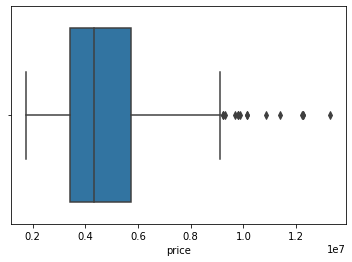

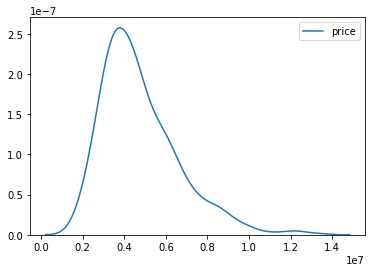

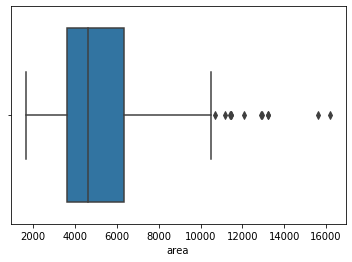

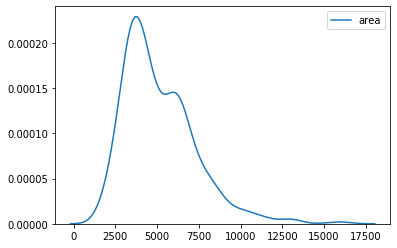

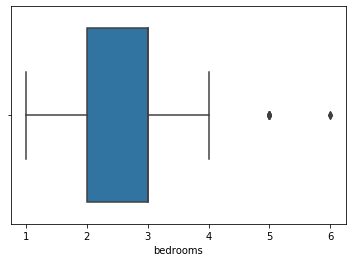

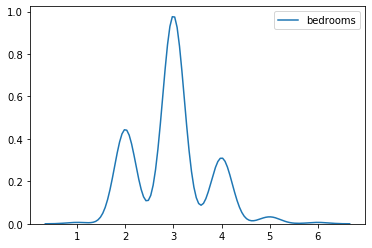

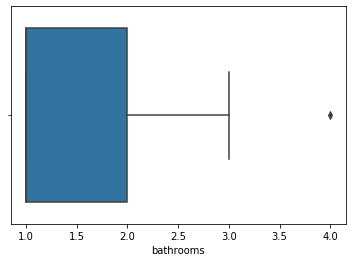

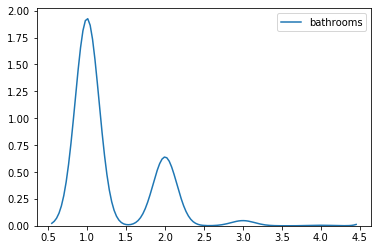

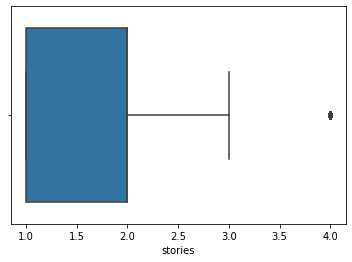

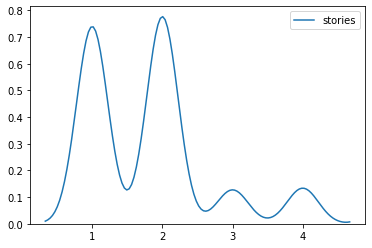

TypeError: unsupported operand type(s) for /: 'str' and 'int'

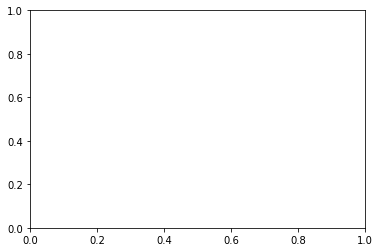

In [4]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()
    sns.kdeplot(df[i])
    plt.show()

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

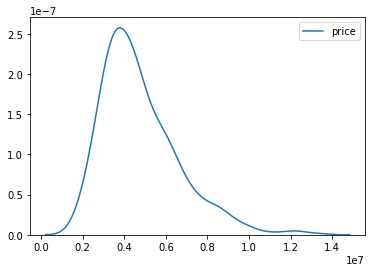

In [7]:
sns.kdeplot(df['price'])

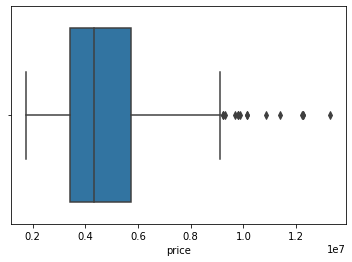

In [8]:
sns.boxplot(df['price'])

In [9]:
##To include outliers of Target, log transformation:

df['lprice'] = np.log(df['price'])

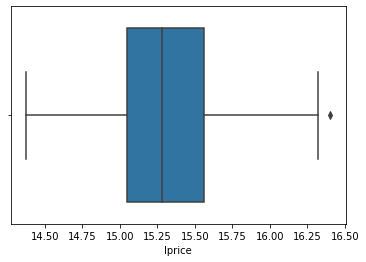

In [10]:
sns.boxplot(df['lprice'])

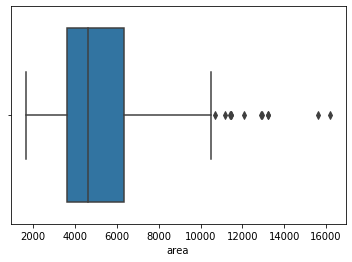

In [11]:
sns.boxplot(df['area'])

In [12]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3 - q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)

df1 = df[(df['area']>ll)&(df['area']<ul)]

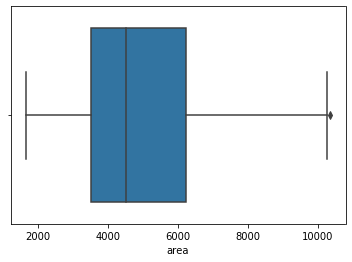

In [13]:
sns.boxplot(df1['area'])

In [14]:
df1['furnishingstatus'].value_counts()

semi-furnished    221
unfurnished       176
furnished         133
Name: furnishingstatus, dtype: int64

In [15]:
df1.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
lprice              float64
dtype: object

In [16]:
df1[['bathrooms','stories','parking']] = df1[['bathrooms','stories','parking']].astype(object)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,lprice
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001


In [18]:
cat_cols = list(df1.select_dtypes(include='object').columns)

In [19]:
cat_cols

['bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [20]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,lprice
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001


In [21]:
df1[['price','area']]

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


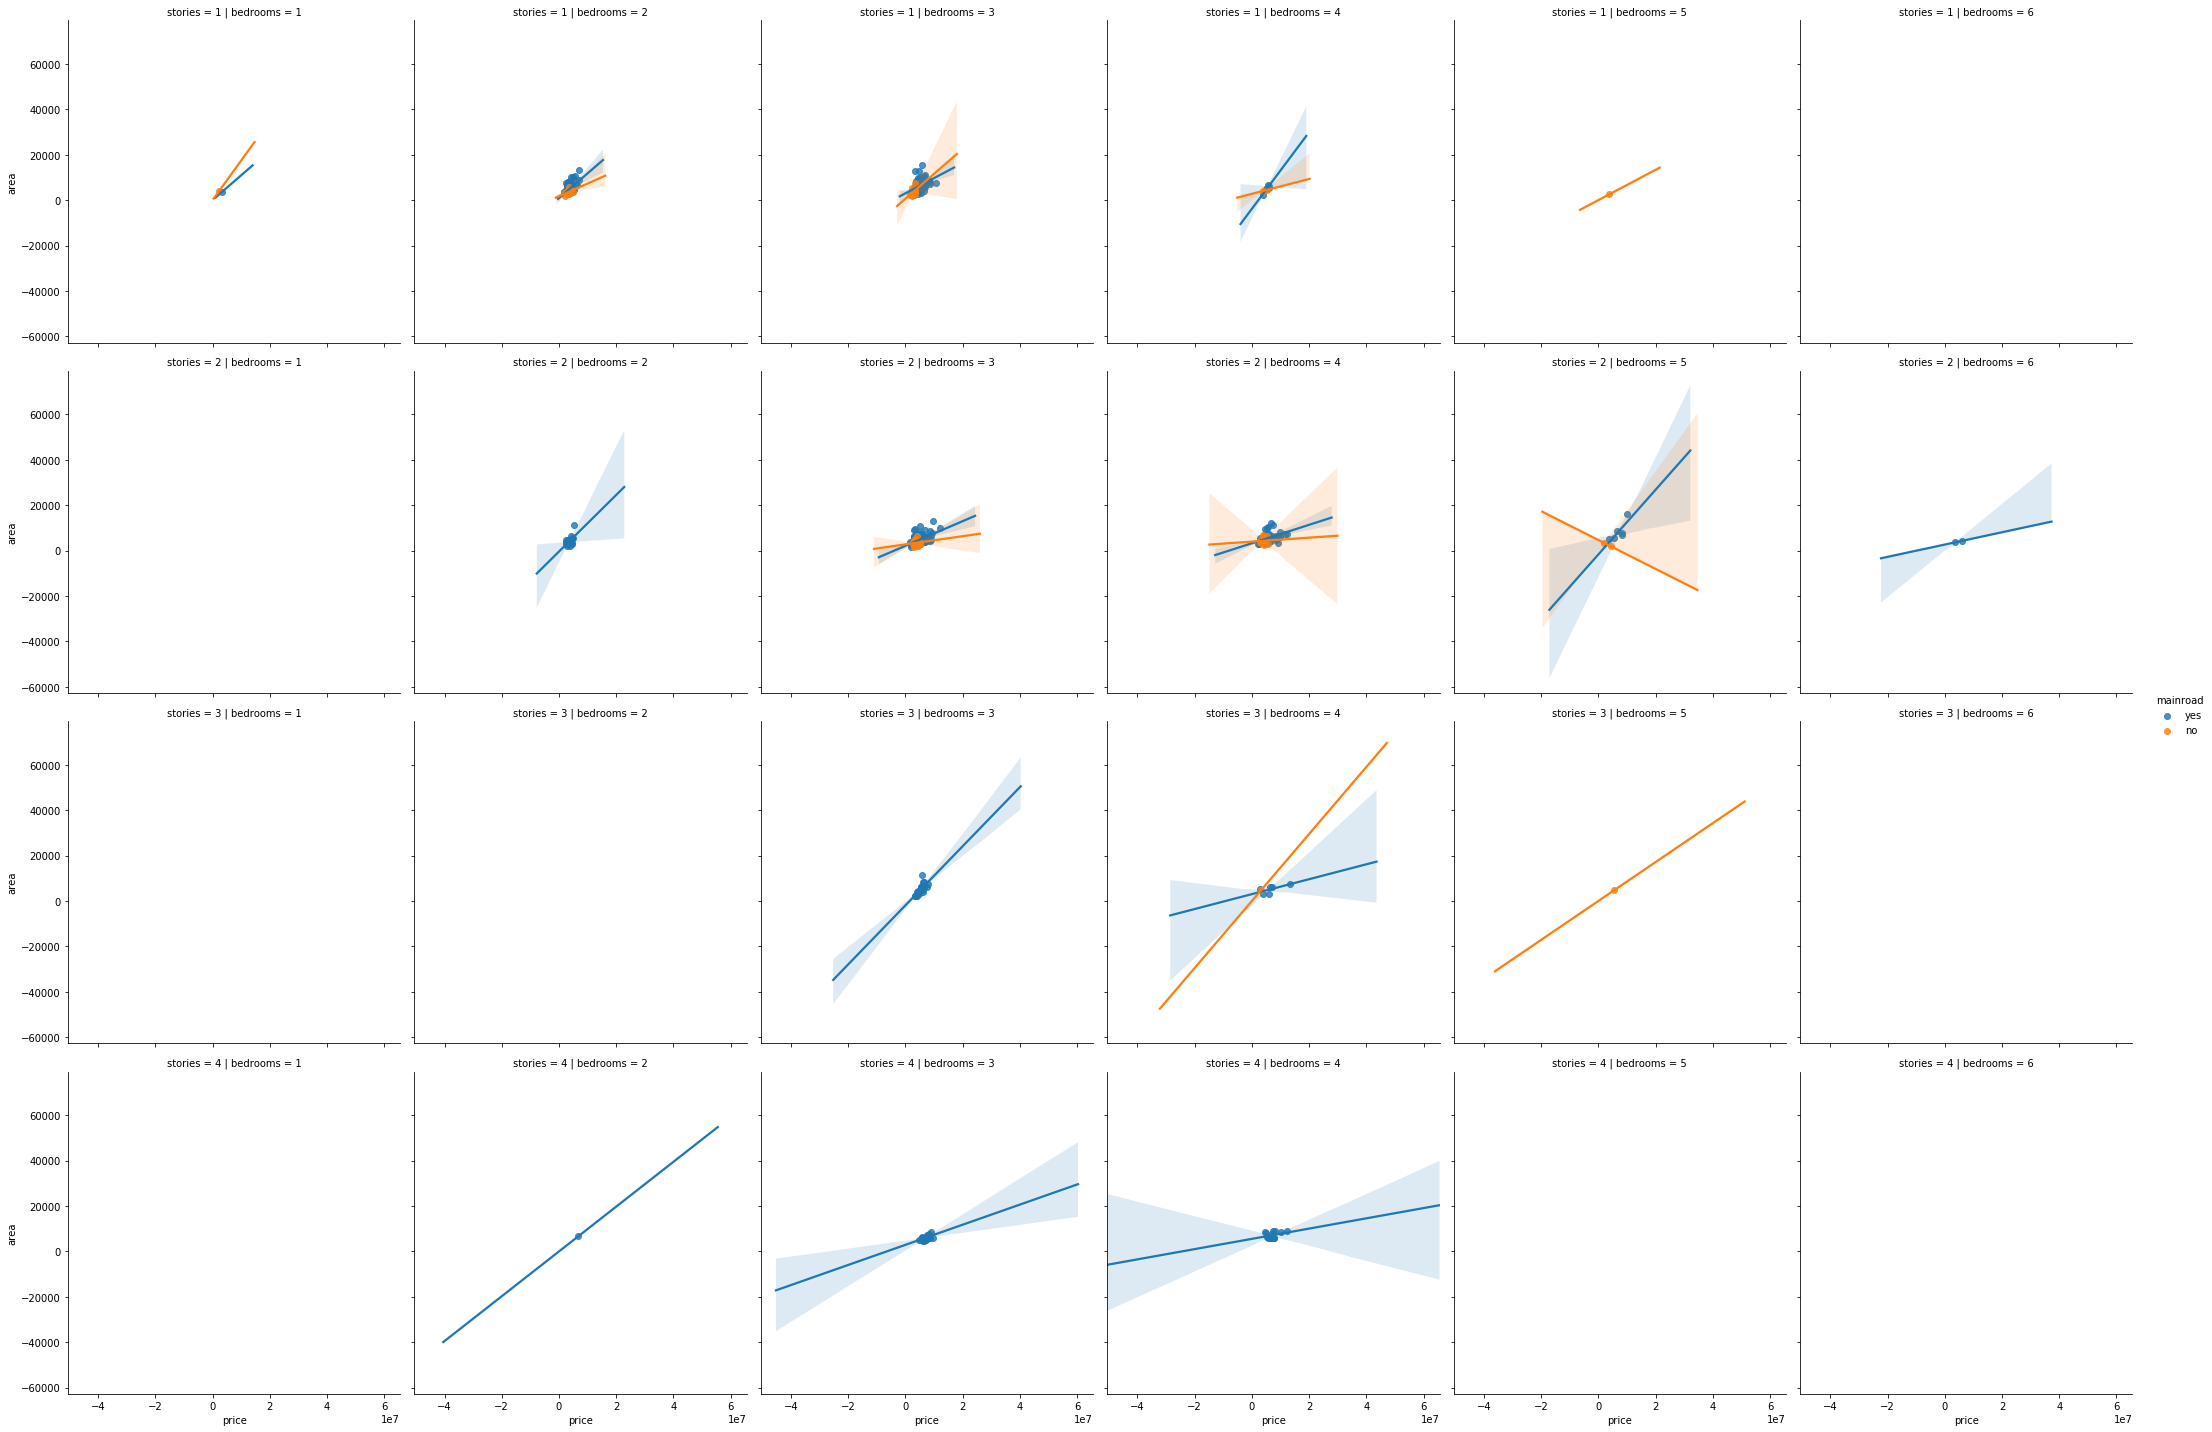

In [22]:

sns.lmplot(col='bedrooms',data=df,x='price',y='area',hue='mainroad',row='stories')

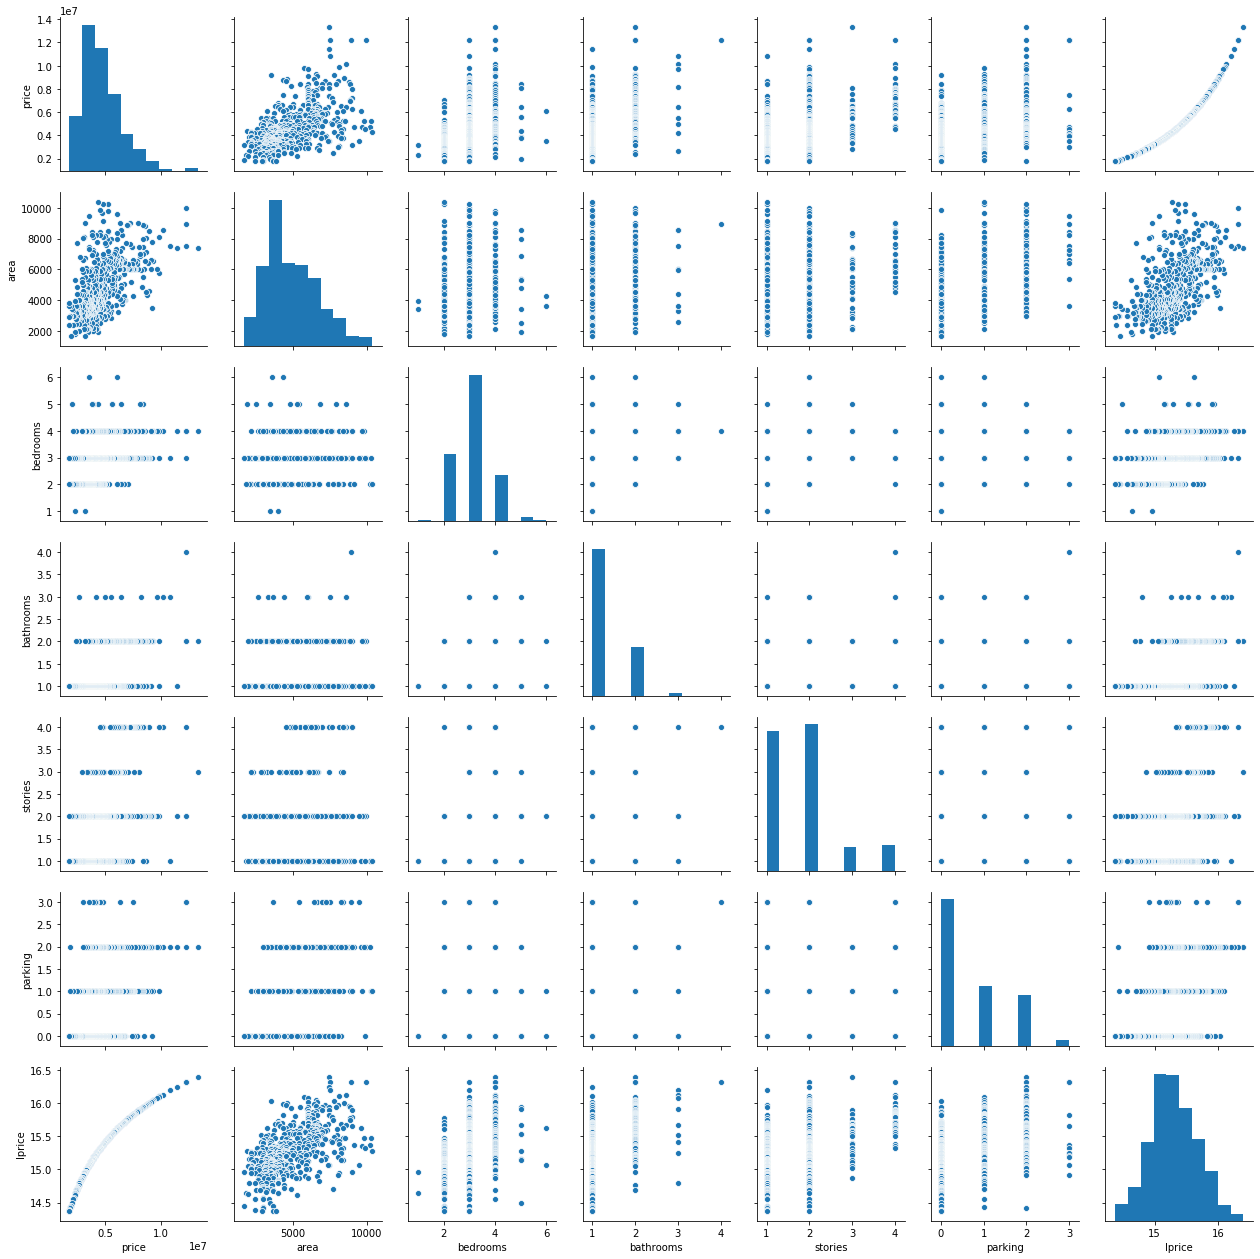

In [23]:
sns.pairplot(df1)

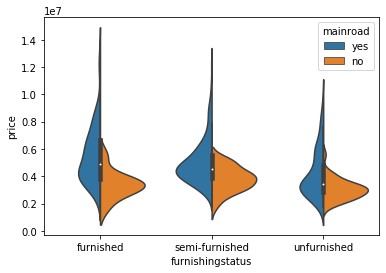

In [24]:
sns.violinplot(data=df1,x='furnishingstatus',y='price',hue='mainroad',split=True)

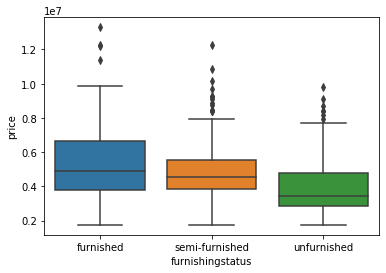

In [25]:
sns.boxplot(data=df1,x='furnishingstatus',y='price')

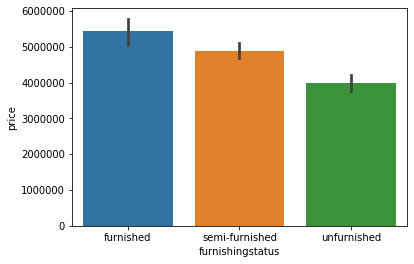

In [26]:
sns.barplot(data=df1,x='furnishingstatus',y='price')

In [27]:
df1 = pd.get_dummies(df1,columns=cat_cols,drop_first=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 544
Data columns (total 21 columns):
price                              530 non-null int64
area                               530 non-null int64
bedrooms                           530 non-null int64
lprice                             530 non-null float64
bathrooms_2                        530 non-null uint8
bathrooms_3                        530 non-null uint8
bathrooms_4                        530 non-null uint8
stories_2                          530 non-null uint8
stories_3                          530 non-null uint8
stories_4                          530 non-null uint8
mainroad_yes                       530 non-null uint8
guestroom_yes                      530 non-null uint8
basement_yes                       530 non-null uint8
hotwaterheating_yes                530 non-null uint8
airconditioning_yes                530 non-null uint8
parking_1                          530 non-null uint8
parking_2                    

In [38]:
y = df1['lprice']
X = df1.drop(columns=['lprice','price'])

In [39]:
X = X.assign(const=1)

In [40]:
X.head()

,area,bedrooms,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,const
0,7420,4,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,8960,4,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,9960,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1
3,7500,4,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
4,7420,4,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1


In [41]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
ols = sm.OLS(y,X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     62.99
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          2.30e-120
Time:                        12:34:01   Log-Likelihood:                 94.782
No. Observations:                 530   AIC:                            -149.6
Df Residuals:                     510   BIC:                            -64.11
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              5.48e-05   6.12e-06      8.953      0.000    4.28e-05    6.68e-05
bedrooms                            0.0388      0.015      2.527      0.012       0.009       0.069
bathrooms_2                         0.1613      0.024      6.778      0.000       0.115       0.208
bathrooms_3                         0.2740      0.072      3.825      0.000       0.133       0.415
bathrooms_4                         0.5833      0.219      2.667      0.008       0.154       1.013
stories_2                           0.0577      0.023      2.467      0.014       0.012       0.104
stories_3                           0.1950      0.040      4.867      0.000       0.116       0.274
stories_4                           0.2678      0.042      6.449      0.000       0.186       0.349
mainroad_yes                        0.1126      0.028      4.054      0.000       0.058       0.167
guestroom_yes                       0.0594      0.026      2.277      0.023       0.008       0.111
basement_yes                        0.0951      0.022      4.346      0.000       0.052       0.138
hotwaterheating_yes                 0.1494      0.045      3.354      0.001       0.062       0.237
airconditioning_yes                 0.1634      0.022      7.554      0.000       0.121       0.206
parking_1                           0.0746      0.023      3.185      0.002       0.029       0.121
parking_2                           0.1078      0.026      4.164      0.000       0.057       0.159
parking_3                          -0.0231      0.066     -0.353      0.724      -0.152       0.106
prefarea_yes                        0.1218      0.023      5.250      0.000       0.076       0.167
furnishingstatus_semi-furnished     0.0209      0.023      0.902      0.368      -0.025       0.066
furnishingstatus_unfurnished       -0.1119      0.025     -4.505      0.000      -0.161      -0.063
const                              14.5709      0.054    270.404      0.000      14.465      14.677
==============================================================================
Omnibus:                        3.130   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.185
Skew:                          -0.097   Prob(JB):                        0.203
Kurtosis:                       3.327   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
##70% of variation in price is explained by model correctly(based on R-Square)

In [44]:
#Check with price instead of lprice:

In [45]:
y = df1['price']
X = df1.drop(columns=['lprice','price'])

In [46]:
X = X.assign(const=1)

In [47]:
X.head()

,area,bedrooms,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,const
0,7420,4,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,8960,4,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,9960,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1
3,7500,4,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
4,7420,4,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1


In [48]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
ols = sm.OLS(y,X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     58.28
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          1.74e-114
Time:                        12:50:04   Log-Likelihood:                -8095.1
No. Observations:                 530   AIC:                         1.623e+04
Df Residuals:                     510   BIC:                         1.632e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              264.6949     31.464      8.413      0.000     202.880     326.510
bedrooms                         1.543e+05   7.89e+04      1.956      0.051    -681.733    3.09e+05
bathrooms_2                      8.929e+05   1.22e+05      7.298      0.000    6.53e+05    1.13e+06
bathrooms_3                      1.844e+06   3.68e+05      5.007      0.000    1.12e+06    2.57e+06
bathrooms_4                      5.242e+06   1.12e+06      4.663      0.000    3.03e+06    7.45e+06
stories_2                        3.182e+05    1.2e+05      2.648      0.008    8.21e+04    5.54e+05
stories_3                         8.74e+05   2.06e+05      4.245      0.000    4.69e+05    1.28e+06
stories_4                        1.383e+06   2.13e+05      6.479      0.000    9.64e+05     1.8e+06
mainroad_yes                     4.042e+05   1.43e+05      2.832      0.005    1.24e+05    6.85e+05
guestroom_yes                    2.696e+05   1.34e+05      2.010      0.045    6120.337    5.33e+05
basement_yes                     3.624e+05   1.12e+05      3.223      0.001    1.41e+05    5.83e+05
hotwaterheating_yes              8.193e+05   2.29e+05      3.578      0.000    3.69e+05    1.27e+06
airconditioning_yes              8.169e+05   1.11e+05      7.346      0.000    5.98e+05    1.04e+06
parking_1                        3.808e+05    1.2e+05      3.162      0.002    1.44e+05    6.17e+05
parking_2                        6.344e+05   1.33e+05      4.768      0.000    3.73e+05    8.96e+05
parking_3                        4.949e+04   3.37e+05      0.147      0.883   -6.12e+05    7.11e+05
prefarea_yes                     6.508e+05   1.19e+05      5.458      0.000    4.17e+05    8.85e+05
furnishingstatus_semi-furnished -3.233e+04   1.19e+05     -0.271      0.786   -2.66e+05    2.02e+05
furnishingstatus_unfurnished     -4.33e+05   1.28e+05     -3.390      0.001   -6.84e+05   -1.82e+05
const                            1.366e+06   2.77e+05      4.932      0.000    8.22e+05    1.91e+06
==============================================================================
Omnibus:                      111.657   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.420
Skew:                           0.996   Prob(JB):                     3.97e-73
Kurtosis:                       6.336   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
y = df1['lprice']
X = df1.drop(columns=['lprice','price'])

In [149]:
X = X.assign(const=1)

In [150]:
X.head()

,area,bedrooms,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,const
0,7420,4,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,8960,4,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,9960,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1
3,7500,4,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
4,7420,4,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1


In [151]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
ols = sm.OLS(y,X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     62.99
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          2.30e-120
Time:                        15:22:03   Log-Likelihood:                 94.782
No. Observations:                 530   AIC:                            -149.6
Df Residuals:                     510   BIC:                            -64.11
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              5.48e-05   6.12e-06      8.953      0.000    4.28e-05    6.68e-05
bedrooms                            0.0388      0.015      2.527      0.012       0.009       0.069
bathrooms_2                         0.1613      0.024      6.778      0.000       0.115       0.208
bathrooms_3                         0.2740      0.072      3.825      0.000       0.133       0.415
bathrooms_4                         0.5833      0.219      2.667      0.008       0.154       1.013
stories_2                           0.0577      0.023      2.467      0.014       0.012       0.104
stories_3                           0.1950      0.040      4.867      0.000       0.116       0.274
stories_4                           0.2678      0.042      6.449      0.000       0.186       0.349
mainroad_yes                        0.1126      0.028      4.054      0.000       0.058       0.167
guestroom_yes                       0.0594      0.026      2.277      0.023       0.008       0.111
basement_yes                        0.0951      0.022      4.346      0.000       0.052       0.138
hotwaterheating_yes                 0.1494      0.045      3.354      0.001       0.062       0.237
airconditioning_yes                 0.1634      0.022      7.554      0.000       0.121       0.206
parking_1                           0.0746      0.023      3.185      0.002       0.029       0.121
parking_2                           0.1078      0.026      4.164      0.000       0.057       0.159
parking_3                          -0.0231      0.066     -0.353      0.724      -0.152       0.106
prefarea_yes                        0.1218      0.023      5.250      0.000       0.076       0.167
furnishingstatus_semi-furnished     0.0209      0.023      0.902      0.368      -0.025       0.066
furnishingstatus_unfurnished       -0.1119      0.025     -4.505      0.000      -0.161      -0.063
const                              14.5709      0.054    270.404      0.000      14.465      14.677
==============================================================================
Omnibus:                        3.130   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.185
Skew:                          -0.097   Prob(JB):                        0.203
Kurtosis:                       3.327   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

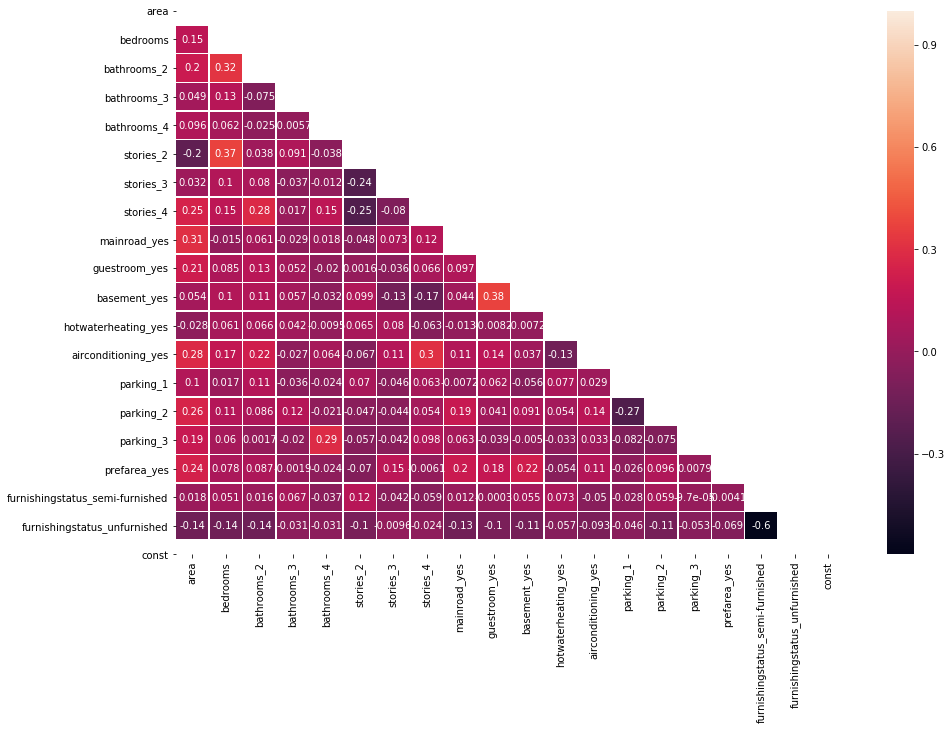

In [153]:
plt.figure(figsize=(15,10))
corr=X.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr,mask=mask,annot=True,linewidth=0.5)

In [154]:
#Checking multicollearity using Heatmap and VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns)

,vif
area,1.531694
bedrooms,1.584356
bathrooms_2,1.306186
bathrooms_3,1.067129
bathrooms_4,1.121876
stories_2,1.673996
stories_3,1.330314
stories_4,1.533028
mainroad_yes,1.192747
guestroom_yes,1.257954


In [155]:
##Check pvalue and drop parking3 and furnishingstatus-semifurnished as pvalue greater than 0.05:
X1 = X.drop(columns=['parking_3','furnishingstatus_semi-furnished'])
ols = sm.OLS(y,X1)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     70.49
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          5.21e-122
Time:                        15:22:05   Log-Likelihood:                 94.287
No. Observations:                 530   AIC:                            -152.6
Df Residuals:                     512   BIC:                            -75.66
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                          5.448e-05      6e-06      9.075      0.000    4.27e-05    6.63e-05
bedrooms                         0.0381      0.015      2.489      0.013       0.008       0.068
bathrooms_2                      0.1607      0.024      6.766      0.000       0.114       0.207
bathrooms_3                      0.2777      0.071      3.885      0.000       0.137       0.418
bathrooms_4                      0.5519      0.211      2.615      0.009       0.137       0.966
stories_2                        0.0591      0.023      2.535      0.012       0.013       0.105
stories_3                        0.1949      0.040      4.887      0.000       0.117       0.273
stories_4                        0.2672      0.041      6.441      0.000       0.186       0.349
mainroad_yes                     0.1108      0.028      4.003      0.000       0.056       0.165
guestroom_yes                    0.0590      0.026      2.272      0.023       0.008       0.110
basement_yes                     0.0949      0.022      4.343      0.000       0.052       0.138
hotwaterheating_yes              0.1511      0.044      3.398      0.001       0.064       0.238
airconditioning_yes              0.1621      0.022      7.523      0.000       0.120       0.204
parking_1                        0.0744      0.023      3.217      0.001       0.029       0.120
parking_2                        0.1091      0.025      4.281      0.000       0.059       0.159
prefarea_yes                     0.1216      0.023      5.250      0.000       0.076       0.167
furnishingstatus_unfurnished    -0.1251      0.020     -6.333      0.000      -0.164      -0.086
const                           14.5886      0.051    287.992      0.000      14.489      14.688
==============================================================================
Omnibus:                        3.402   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.478
Skew:                          -0.108   Prob(JB):                        0.176
Kurtosis:                       3.334   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
#Checking normailty of residuals

In [157]:
residuals = result.resid

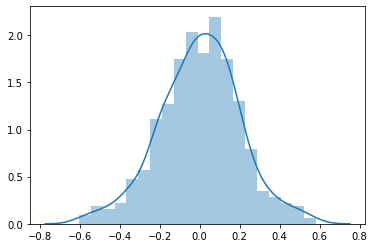

In [158]:
sns.distplot(residuals)

In [159]:
#Check linearity of residuals

Text(0.5, 1.0, 'Probability plot')

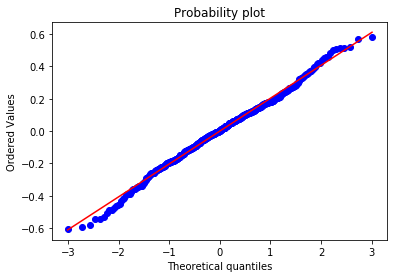

In [160]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
stats.probplot(residuals,dist='norm',plot=pylab)
plt.title('Probability plot')

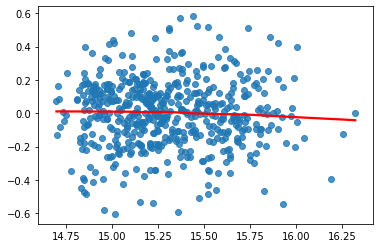

In [161]:
#Check Heteroscedacity

y_pred = result.predict(X1)

sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.show()

In [162]:
#Shows homoscedacity

In [163]:
#Test-Goldfeld

import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(y=result.resid,x=X1)
test

(1.0185272735229933, 0.44252373130138456, 'increasing')

In [164]:
#Null accepted as pvalue greater than 0.05.


# polynomial features using interaction:

##Improving model accuracy by Considering Interaction and transformation


In [174]:
from sklearn.preprocessing import PolynomialFeatures

X1 = X1.drop('const',axis=1)
pf = PolynomialFeatures()
Xp1 = pf.fit_transform(X1)
cols = pf.get_feature_names(X1.columns)
Xp = pd.DataFrame(Xp1,columns=cols)

KeyError: "['const'] not found in axis"

In [175]:
Xp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 171 columns):
1                                                   float64
area                                                float64
bedrooms                                            float64
bathrooms_2                                         float64
bathrooms_3                                         float64
bathrooms_4                                         float64
stories_2                                           float64
stories_3                                           float64
stories_4                                           float64
mainroad_yes                                        float64
guestroom_yes                                       float64
basement_yes                                        float64
hotwaterheating_yes                                 float64
airconditioning_yes                                 float64
parking_1                                           fl

In [176]:
ys = list(y)
ols = sm.OLS(ys,Xp).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     12.41
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           2.08e-84
Time:                        15:26:40   Log-Likelihood:                 194.80
No. Observations:                 530   AIC:                            -135.6
Df Residuals:                     403   BIC:                             407.1
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
1                                                   14.4036      0.224     64.307      0.000      13.963      14.844
area                                                 0.0002   4.86e-05      3.437      0.001    7.14e-05       0.000
bedrooms                                             0.0498      0.107      0.464      0.643      -0.161       0.261
bathrooms_2                                          0.0609      0.083      0.734      0.463      -0.102       0.224
bathrooms_3                                         -0.0063      0.098     -0.064      0.949      -0.199       0.187
bathrooms_4                                      -6.739e-08   3.41e-09    -19.772      0.000   -7.41e-08   -6.07e-08
stories_2                                            0.1433      0.083      1.736      0.083      -0.019       0.306
stories_3                                            0.2030      0.278      0.730      0.466      -0.344       0.750
stories_4                                            0.2694      0.113      2.390      0.017       0.048       0.491
mainroad_yes                                        -0.0500      0.074     -0.680      0.497      -0.195       0.095
guestroom_yes                                        0.1473      0.089      1.657      0.098      -0.027       0.322
basement_yes                                        -0.0094      0.066     -0.143      0.887      -0.139       0.120
hotwaterheating_yes                                 -0.3912      0.180     -2.173      0.030      -0.745      -0.037
airconditioning_yes                                  0.0360      0.071      0.506      0.613      -0.104       0.176
parking_1                                           -0.1640      0.069     -2.389      0.017      -0.299      -0.029
parking_2                                           -0.0089      0.158     -0.056      0.955      -0.320       0.302
prefarea_yes                                        -0.1706      0.112     -1.524      0.128      -0.391       0.050
furnishingstatus_unfurnished                        -0.0273      0.059     -0.465      0.642      -0.143       0.088
area^2                                           -1.326e-08   3.33e-09     -3.984      0.000   -1.98e-08   -6.72e-09
area bedrooms                                      1.36e-07   1.15e-05      0.012      0.991   -2.24e-05    2.27e-05
area bathrooms_2                                  3.182e-05   1.75e-05      1.823      0.069    -2.5e-06    6.61e-05
area bathrooms_3                                  8.281e-05   7.63e-05      1.085      0.279   -6.72e-05       0.000
area bathrooms_4                                  9.982e-05   2.81e-05      3.549      0.000    4.45e-05       0.000
area stories_2                           

In [186]:
#Backward Elimination to select features
cols = list(Xp.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = Xp[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(ys,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(len(selected_features_BE))

['1', 'area', 'stories_2', 'stories_3', 'stories_4', 'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking_1', 'prefarea_yes', 'area^2', 'area bathrooms_2', 'area bathrooms_4', 'area guestroom_yes', 'area hotwaterheating_yes', 'bedrooms bathrooms_3', 'bedrooms bathrooms_4', 'bedrooms basement_yes', 'bedrooms hotwaterheating_yes', 'bedrooms parking_1', 'bedrooms parking_2', 'bedrooms furnishingstatus_unfurnished', 'bathrooms_2 stories_2', 'bathrooms_2 hotwaterheating_yes', 'bathrooms_2 furnishingstatus_unfurnished', 'bathrooms_3 guestroom_yes', 'bathrooms_3 parking_1', 'bathrooms_4^2', 'bathrooms_4 stories_4', 'bathrooms_4 mainroad_yes', 'bathrooms_4 airconditioning_yes', 'stories_2^2', 'stories_3^2', 'stories_4^2', 'stories_4 mainroad_yes', 'mainroad_yes hotwaterheating_yes', 'mainroad_yes parking_1', 'mainroad_yes prefarea_yes', 'guestroom_yes^2', 'guestroom_yes parking_2', 'guestroom_yes prefarea_yes', 'basement_yes parking_1', 'hotwaterheating_yes^2', 'hotwaterheat

In [187]:
Xs = Xp.loc[:,selected_features_BE]

In [188]:
Xs

,1,area,stories_2,stories_3,stories_4,guestroom_yes,hotwaterheating_yes,airconditioning_yes,parking_1,prefarea_yes,...,guestroom_yes^2,guestroom_yes parking_2,guestroom_yes prefarea_yes,basement_yes parking_1,hotwaterheating_yes^2,hotwaterheating_yes airconditioning_yes,airconditioning_yes^2,parking_1^2,parking_1 parking_2,prefarea_yes^2
0,1.0,7420.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,8960.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,9960.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,7500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,7420.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,1.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,1.0,3620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,1.0,2910.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
#Model using selected features
ols = sm.OLS(ys,Xs).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     47.24
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          2.79e-129
Time:                        15:33:48   Log-Likelihood:                 144.77
No. Observations:                 530   AIC:                            -223.5
Df Residuals:                     497   BIC:                            -82.54
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
1                                           14.4591      0.069    208.927      0.000      14.323      14.595
area                                         0.0002   2.59e-05      7.042      0.000       0.000       0.000
stories_2                                    0.0318      0.010      3.061      0.002       0.011       0.052
stories_3                                    0.1193      0.018      6.565      0.000       0.084       0.155
stories_4                                    0.0928      0.013      7.007      0.000       0.067       0.119
guestroom_yes                                0.1722      0.040      4.257      0.000       0.093       0.252
hotwaterheating_yes                         -0.3586      0.124     -2.900      0.004      -0.602      -0.116
airconditioning_yes                          0.0772      0.010      7.575      0.000       0.057       0.097
parking_1                                   -0.1549      0.045     -3.432      0.001      -0.244      -0.066
prefarea_yes                                -0.1540      0.069     -2.242      0.025      -0.289      -0.019
area^2                                   -1.097e-08   2.27e-09     -4.829      0.000   -1.54e-08   -6.51e-09
area bathrooms_2                          1.667e-05   5.32e-06      3.130      0.002    6.21e-06    2.71e-05
area bathrooms_4                           7.57e-05    2.2e-05      3.441      0.001    3.25e-05       0.000
area guestroom_yes                       -5.303e-05   1.47e-05     -3.606      0.000   -8.19e-05   -2.41e-05
area hotwaterheating_yes                 -9.551e-05   3.28e-05     -2.912      0.004      -0.000   -3.11e-05
bedrooms bathrooms_3                         0.0672      0.021      3.223      0.001       0.026       0.108
bedrooms bathrooms_4                       3.38e-08   9.82e-09      3.441      0.001    1.45e-08    5.31e-08
bedrooms basement_yes                        0.0393      0.007      5.589      0.000       0.025       0.053
bedrooms hotwaterheating_yes                 0.3277      0.077      4.247      0.000       0.176       0.479
bedrooms parking_1                           0.0825      0.025      3.336      0.001       0.034       0.131
bedrooms parking_2                           0.0293      0.008      3.552      0.000       0.013       0.045
bedrooms furnishingstatus_unfurnished       -0.0502      0.007     -7.140      0.000      -0.064      -0.036
bathrooms_2 stories_2                        0.0880      0.038      2.304      0.022       0.013       0.163
bathrooms_2 hotwaterheating_yes             -0.3481      0.115     -3.017      0.003      -0.575      -0.121
bathrooms_2 furnishingstatus_unfurnished     0.1671      0.047      3.542      0.000       0.074       0.260
bathrooms_3 guestroom_yes      

In [219]:
df = pd.read_csv('Housing.csv')
df['lprice'] = np.log(df['price'])

q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3-q1

df = df[~(df['area']>(q3+1.5*iqr))]

df[['bathrooms', 'stories', 'parking']] = df[['bathrooms',
                                    'stories', 'parking']].astype(object)

cat_cols = list(df.select_dtypes(include='object').columns)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

y = df['lprice']
X = df.drop(['price', 'lprice'], axis=1)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()

Xp = pf.fit_transform(X)
cols = pf.get_feature_names(X.columns)

Xp = pd.DataFrame(Xp, columns=cols)

In [220]:
##Machine learning algorithms now:


X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.3, random_state=1)

In [221]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
result = lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [223]:
y_test_pred

array([15.28955318, 15.31722686, 15.1342983 , 15.2188123 , 15.43284218,
       15.12134095, 15.36855145, 15.31379818, 15.6544795 , 15.61601161,
       15.23648228, 15.10225777, 15.00362671, 15.13022435, 15.19426081,
       15.13360776, 15.92057987, 15.78077976, 14.98179756, 16.07514403,
       16.02316965, 15.35252624, 15.66622484, 15.30881437, 14.86961452,
       15.01630646, 15.67526183, 15.65633035, 15.39320047, 14.85207408,
       14.80267523, 15.18566613, 15.39239649, 15.59771083, 14.88283881,
       15.61124905, 15.08490363, 15.15917402, 14.98723447, 15.7564811 ,
       16.06446887, 15.36450035, 15.15638243, 14.9301749 , 15.13618786,
       15.91111827, 15.79006893, 15.74781898, 14.81715695, 15.2527834 ,
       15.49696596, 15.65794185, 15.63167995, 14.72570282, 14.84319973,
       15.05905056, 15.24458957, 15.29125603, 15.32698428, 15.40675546,
       15.70074903, 15.18729056, 15.10610088, 14.71092013, 13.86839284,
       15.36971489, 15.42104552, 14.96062686, 15.11617392, 14.90

In [224]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.011233987424787983

In [225]:
r2_score(y_train,y_train_pred)

0.845922328761878

In [226]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_test_pred))

0.364356030767674

In [227]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

0.14530513721128716

In [233]:
#USE RFE(to reduce over-fitting) and reduce the number of variables:

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold

In [234]:
params = [{'n_features_to_select':list(range(1,60))}]
lr = LinearRegression()
rfe = RFE(lr)

folds = KFold(n_splits=3,random_state=1)
model_cv = GridSearchCV(rfe,param_grid=params,cv=folds)
model_cv.fit(Xp,y)


GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [235]:
model_cv.best_params_

{'n_features_to_select': 1}

In [236]:
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=1)

rfe.fit(Xp,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [243]:
cols = pd.DataFrame(list(zip(Xp.columns,rfe.support_,rfe.ranking_)),columns=['cols','select','rank'])
cols.sort_values(by='rank').head(8)

,cols,select,rank
133,stories_4 mainroad_yes,True,1
204,prefarea_yes^2,False,2
8,stories_4,False,3
15,parking_2,False,4
7,stories_3,False,5
195,parking_2^2,False,6
119,stories_3^2,False,7
17,prefarea_yes,False,8


In [246]:
a = list(cols.sort_values(by='rank').head(8)['cols'])

In [250]:
Xp[a]

,stories_4 mainroad_yes,prefarea_yes^2,stories_4,parking_2,stories_3,parking_2^2,stories_3^2,prefarea_yes
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
528,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
##Now building model with 8 top features

Xp1 = Xp[a]

In [252]:
##Machine learning algorithms now:


X_train, X_test, y_train, y_test = train_test_split(Xp1, y, test_size=0.3, random_state=1)

In [253]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
result = lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [255]:
y_test_pred

array([15.40687738, 15.16078363, 15.40687738, 15.16078363, 15.40687738,
       15.16078363, 15.16078363, 15.16078363, 15.40687738, 15.40687738,
       15.16078363, 15.40687738, 15.16078363, 15.37562738, 15.16078363,
       15.16078363, 15.37562738, 15.16078363, 15.37562738, 15.87367426,
       15.61000238, 15.16078363, 15.16078363, 15.16078363, 15.16078363,
       15.37562738, 15.37562738, 15.37562738, 15.37562738, 15.16078363,
       15.16078363, 15.16078363, 15.37562738, 15.65883051, 15.16078363,
       15.37562738, 15.16078363, 15.16078363, 15.16078363, 15.62172113,
       15.16078363, 15.62172113, 15.16078363, 15.16078363, 15.16078363,
       15.16078363, 15.90687738, 15.40687738, 15.16078363, 15.16078363,
       15.37562738, 15.40687738, 15.65883051, 15.16078363, 15.16078363,
       15.16078363, 15.16078363, 15.16078363, 15.16078363, 15.16078363,
       15.37562738, 15.16078363, 15.16078363, 15.16078363, 15.37562738,
       15.16078363, 15.40687738, 15.16078363, 15.16078363, 15.16

In [256]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.33376487944545163

In [257]:
r2_score(y_train,y_train_pred)

0.3216991053022825

In [258]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_test_pred))

0.2990838474403384

In [259]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

0.30487534933219507